## Observations and Insights 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID', how='outer')

mouse_study_df.head()

# Display the data table for preview


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [26]:
# Checking the number of mice.
Total_Mice = len(mouse_study_df["Mouse ID"].unique())
Total_Mice_df = pd.DataFrame({"Number of Mice":[Total_Mice]})
Total_Mice_df

Number of Mice
0             249

In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


mouse_study_df[mouse_study_df.duplicated(keep=False)]


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
908                45.0                 0  
909                45.0                 0

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study["908"]
#est

NameError: name 'mouse_study' is not defined

In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
## This drops the dup but not by id
#mouse_study.drop(["g989"])
#mouse_study_df.drop(["g989"], (axis = 1)
#mouse_study_df.head()
mouse_study_clean_df = mouse_study_df.drop_duplicates()

mouse_study_clean_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1892 rows x 8 columns]

In [35]:
# Checking the number of mice in the clean DataFrame.

Total_Mice = len(mouse_study_clean_df["Mouse ID"].unique())
Total_Mice_Clean_df = pd.DataFrame({"Number of Mice":[Total_Mice]})
Total_Mice_Clean_df

Number of Mice
0             249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean=mouse_study_clean_df["Tumor Volume (mm3)"].mean()
median= mouse_study_clean_df["Tumor Volume (mm3)"].median()
varience = mouse_study_clean_df["Tumor Volume (mm3)"].var()
Std_dev = mouse_study_clean_df["Tumor Volume (mm3)"].std()
#SEM = mouse_study_clean_df["Tumor Volume (mm3)"].sem()
Summary_Stats_df = pd.DataFrame({
            "Mean" : mean, 
            "Median": median, 
            "Variance": varience ,
            "Standard Deviation": Std_dev,
           # "SEM ": SEM
})
Summary_Stats_df


ValueError: If using all scalar values, you must pass an index

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

mouse_study_clean_df.groupby["Tumor Volume (mm3)"].describe()

TypeError: 'method' object is not subscriptable

## Bar and Pie Charts

In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 


plot_mice_df = pd.DataFrame(mouse_study_clean_df["Drug Regimen"].value_counts())
plot_mice_df.plot(kind = "bar")

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Drug Regimen = ["Drug Regimen"]
pd.DataFrame(mouse_study_clean_df["Drug Regimen"].pyplot.plot()

SyntaxError: invalid syntax (<ipython-input-17-fea308794984>, line 2)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000014CF15DF940>],
      dtype=object)

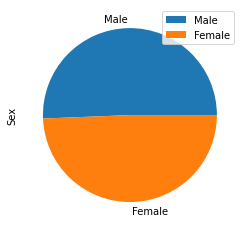

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plot_mice_df = pd.DataFrame(mouse_study_clean_df["Sex"].value_counts())
plot_mice_df.plot(kind = "pie", subplots = True)


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
